# Método da Máxima Verossimilhança


Ideia do campo matemático, usada inicialmente por matemáticos importantes como Gauss e Laplace e posteriormente, no campo da estatística, defendido pelo estatístico inglês Ronald Fisher.

A função densidade de um vetor aleatório $(x_1,...,x_n)$ cuja distribuição depende de um parâmetro $\theta$ é a função densidade de probabilidade conjunta dada por:

$$fx_1,...,x_n(x_1,...,x_n,\theta)$$

Se forem amostras independentes temos $fx_1,...,x_n(x_1,...,x_n,\theta) = fx_1(x_1,\theta)fx_2(x_2,\theta)...fx_n(x_n,\theta)$

E através de que a mesma amostra provém da mesma distribuição de $X$, podemos escrever da seguinte forma:

$$fx_1,...,x_n(x_1,...,x_n,\theta) = \prod_{i=1}^{n}{fx_i(x_i,\theta)}$$

Quando observamos $x_1,...,x_n$ a função $fx_1,...,x_n(x_1,...,x_n,\theta)$ passa a ser uma função do parâmetro $\theta$, chamada de ***função verossimilhança*** e denotada por:

$$L(\theta) = L(\theta;x) = \prod_{i=1}^{n}{fx(x_i;\theta)}$$

A letra $L$ está associada ao termo em inglês ***likelihood*** traduzida como ***verossimilhança***

O estimador de máxima verossimilhança de $\theta$ é tal que $\hat{\theta}$ pertence ao espaço paramétrico e maximiza a função de verossimilhança $L(\theta;x)$.

Ideia : Devemos encontrar $\theta$ de tal forma que os dados observados $x_1,...,x_n$ tenham maior (máximo) probabilidade de serem obtidos.

### EXEMPLO (sem a necessidade de um método numérico)

Aplicando Máxima Verossimilhança para estimar o parâmetro $\theta$ da distribuição exponencial

$$fx(x;\theta)= \theta \exp^{-\theta{x}}, x>0, \theta >0$$

Aplicando o produtório

$L(\theta) = \prod_{i=1}^{n}{fx(x_i;\theta)} = \prod_{i=1}^{n}\theta \exp^{-\theta{x_i}} = \theta^{n}\exp^{-\theta\sum_{i=1}^{n}x_i}$

**OBS**: Maximizar $L(\theta)$ é equivalente a maximizar $log{L(\theta)}$, pois a função logarítima é monótona crescente. Assim, obtemos a função de ***Log Verossimilhança***, o procedimento do $\log$ é mais conveniente e irá alcançar o mesmo máximo.

$$l(\theta) = \log{L(\theta)}$$

Assim

$l(\theta) = \log[\theta^{n}\exp^{-\theta\sum_{i=1}^{n}x_i}] = n\log\theta - \theta\sum_{i=1}^{n}x_i$

Agora a primeira derivada para encontrar o ponto crítico

$$\frac{\partial l}{\partial\theta} = \frac{n}{\theta} - \sum_{i=1}^{n}x_i$$

$$\frac{\partial l}{\partial\theta} = 0 \iff 0 = \frac{n}{\hat\theta} - \sum_{i=1}^{n}x_i \iff \sum_{i=1}^{n}x_i = \frac{n}{\hat\theta} \iff \hat\theta = \frac{1}{\bar{x}}$$

Vendo se será ponto de Máximo ou Mínimo, se for menor que 0 será ponto de Máximo, o contrário será ponto de Mínimo.

$$\frac{\partial^{2}l}{\partial\theta^{2}} = \frac{-n}{\hat\theta^{2}} < 0$$ Logo, Máximo

$$\hat\theta = \frac{1}{\bar{x}}$$ é o estimador de Máxima Verossimilhança de $\theta$

### EXEMPLO (necessidade de um método numérico)

Aplicando Máxima Verossimilhança para estimar o parâmetro $\theta$ da distribuição Lindley unitária (UL)


$$fx(x;\theta) = \frac{\theta^{2}}{1+\theta}(1+x)^{-3}\exp\bigg(-\frac{\theta x}{1-x}\bigg),0<x<1,\theta>0$$

Aplicando o EMV na densidade

verossimilhança:

$$L(\theta) = \prod_{i=1}^{n}fx(xi;\theta)=\prod_{i=1}^{n}\frac{\theta^{2}}{1+\theta}(1+xi)^{-3}\exp\bigg(-\frac{\theta xi}{1-xi}\bigg) =\frac{\theta^{2n}}{(1+\theta)^{n}}\prod_{i=1}^{n}(1+xi)^{-3}\exp\bigg(\sum_{i=1}^{n}-\frac{\theta xi}{1-xi}\bigg)$$

log-verossimilhança:

$$l(\theta)=2n\log\theta - n\log(1+\theta) + \sum_{i=1}^{n}\log(1+xi)^{-3} - \sum_{i=1}^{n}\frac{\theta xi}{1-xi}$$

primeira derivada:

$$\frac{\partial l}{\partial\theta} = \frac{2n}{\theta} - \frac{n}{1+\theta} - \sum_{i=1}^{n}\frac{xi}{1-xi}$$

segunda derivada:

$$\frac{\partial^{2}l}{\partial\theta^{2}} = - \frac{2n}{\theta^{2}} + \frac{n}{(1+\theta)^{2}}$$


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

arquivo = "dadosanalfa2.csv"

df = pd.read_csv(arquivo, delimiter=';')

In [ ]:
top10_df = df.sort_values(by='Taxa de analfabetismo - 25 a 29 anos de idade 2010', ascending=False).head(10)
top10_df.style.hide_index()


<ipython-input-2-6d321f5b7670>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  top10_df.style.hide_index()


Territorialidades,Taxa de analfabetismo - 25 a 29 anos de idade 2010
Charrua (RS),0.169600
São Valério do Sul (RS),0.100600
Redentora (RS),0.100400
Benjamin Constant do Sul (RS),0.087200
Lajeado do Bugre (RS),0.061100
Jaquirana (RS),0.061000
Pirapó (RS),0.059700
Inhacorá (RS),0.058400
Fontoura Xavier (RS),0.057700
Lagoão (RS),0.054100


In [ ]:
def newton(f, df, x_antigo, tolerancia = 1e-4):
  erro       = 1

  while erro > tolerancia:
    x_novo   = x_antigo - f(x_antigo)/df(x_antigo)
    erro     = abs(x_antigo - x_novo)/abs(x_antigo)
    x_antigo = x_novo
    print(f'Valor estimado de raiz: {x_novo} - erro: {erro}')

  print(f'A raiz estimada é: {x_novo}')

In [ ]:
lindley = lambda x: (theta**2/(1+theta))*((1+x)**-3)*np.exp((-theta*x)/(1-x))
f = lambda theta: ((2 * n) / theta) - (n / (1 + theta)) - np.sum(x/ (1 - x))
derivf = lambda theta: -(2 * n) / theta**2 + n / ((1 + theta)**2)

In [ ]:
n = df.shape[0]
x = df.iloc[:, 1]

<ipython-input-4-1eb7559df0ab>:2: RuntimeWarning: divide by zero encountered in divide
  f = lambda theta: ((2 * n) / theta) - (n / (1 + theta)) - np.sum(x/ (1 - x))


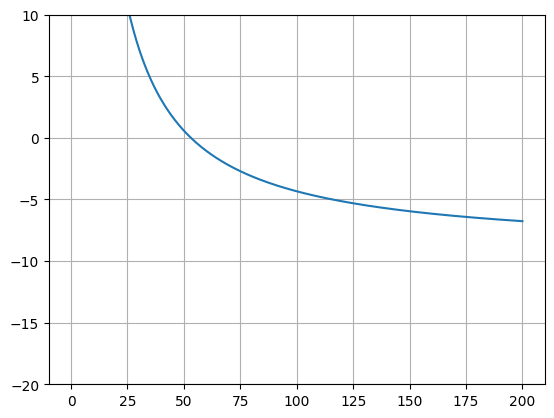

In [ ]:
theta = np.linspace(0, 200, 1000)
plt.plot(theta, f(theta), "-")
plt.grid()
plt.ylim(-20, 10)
plt.show()

In [ ]:
theta0 = 50
newton(f, derivf, theta0, 1e-4)

Valor estimado de raiz: 52.943020318337574 - erro: 0.058860406366751473
Valor estimado de raiz: 53.129967723328974 - erro: 0.0035311057787658644
Valor estimado de raiz: 53.13064163820499 - erro: 1.2684270382525057e-05
A raiz estimada é: 53.13064163820499


In [ ]:
def bissec(f, a, b, eps = 1e-4):
    err = 100
    x_ant = a
    iteracao = 1
    while err>eps:
        x = (a+b)/2.0
        err = abs(x - x_ant)/abs(x)
        if f(a)*f(x)<0:
            b = x
        else:
            a = x
        x_ant = x
        print (f'Iteração: {iteracao} | Raiz estimada: {x} | Erro: {err}')
        iteracao +=1
    return (x)

In [ ]:
a = 50
b = 70
bissec(f,a,b)

Iteração: 1 | Raiz estimada: 60.0 | Erro: 0.16666666666666666
Iteração: 2 | Raiz estimada: 55.0 | Erro: 0.09090909090909091
Iteração: 3 | Raiz estimada: 52.5 | Erro: 0.047619047619047616
Iteração: 4 | Raiz estimada: 53.75 | Erro: 0.023255813953488372
Iteração: 5 | Raiz estimada: 53.125 | Erro: 0.011764705882352941
Iteração: 6 | Raiz estimada: 53.4375 | Erro: 0.005847953216374269
Iteração: 7 | Raiz estimada: 53.28125 | Erro: 0.002932551319648094
Iteração: 8 | Raiz estimada: 53.203125 | Erro: 0.0014684287812041115
Iteração: 9 | Raiz estimada: 53.1640625 | Erro: 0.0007347538574577516
Iteração: 10 | Raiz estimada: 53.14453125 | Erro: 0.0003675119441381845
Iteração: 11 | Raiz estimada: 53.134765625 | Erro: 0.0001837897445322551
Iteração: 12 | Raiz estimada: 53.1298828125 | Erro: 9.190331770976932e-05


53.1298828125

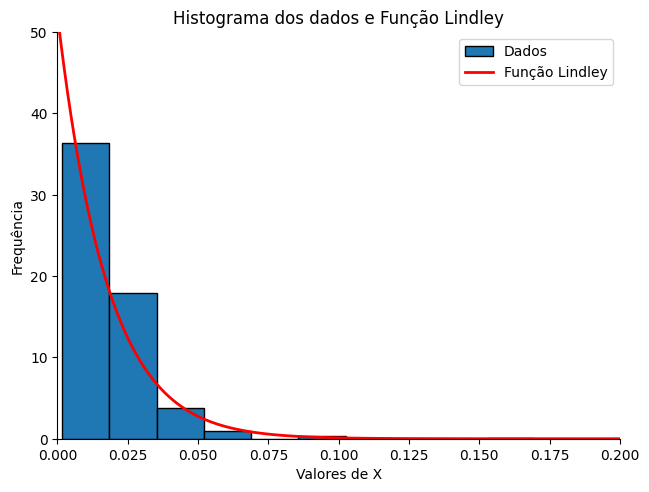

In [ ]:
theta = 53.1298828125

x2 = np.linspace(0, 0.2, 1000)

plt.hist(x, density=True, edgecolor='black', label='Dados')

plt.plot(x2, lindley(x2), '-', color='red', linewidth=2, label='Função Lindley')

plt.xlabel('Valores de X')
plt.ylabel('Frequência')
plt.tight_layout()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0, 50)
plt.xlim(0,0.2)
plt.title('Histograma dos dados e Função Lindley')
plt.legend()
plt.show()